In [1]:
from DROPStomo import WQST1Q
from DROPStomo import WQST2Q
from DROPStomo import WQPT1Q

from turtle import circle
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import time
from fractions import Fraction
from math import gcd
from numpy import pi
from qiskit import IBMQ

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, visualize_transition, plot_bloch_vector
from qiskit.circuit.library import *
from qiskit import (QuantumRegister, ClassicalRegister, QuantumCircuit,
    execute, Aer, compiler)
from qiskit.tools.monitor import job_monitor
from qiskit.tools import job_monitor, backend_monitor, backend_overview
from qiskit.quantum_info import Statevector
from qiskit.visualization import exceptions
from qiskit.visualization import latex as _latex
from qiskit.visualization import text as _text
from qiskit.visualization import utils
from qiskit.visualization import matplotlib as _matplotlib
import matplotlib as mpl

from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
# Provide the simulator and the actual quantum device (qudevice5) name. For example ibmq_armonk is our system here which is a single qubit quantum processor. 
simulator = Aer.get_backend('qasm_simulator')

In [8]:
# gate to tomograph
Up = U3Gate(theta=pi, phi=0, lam=0) 
# resolution for scanning (only polar angles)
res_theta = 8
circ_u = WQPT1Q.WQPT_1Q_circuits(res_theta,Up)

┌───┐              ░               ░ ┌──────────────┐ ░ ┌─┐   
   q_0: ┤ H ├──────■───────░───────────────░─┤ U3(-π/2,0,0) ├─░─┤M├───
        └───┘┌─────┴─────┐ ░ ┌───────────┐ ░ └──────────────┘ ░ └╥┘┌─┐
   q_1: ─────┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░──────────────────░──╫─┤M├
             └───────────┘ ░ └───────────┘ ░                  ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════════╩══╩═
                                                                 0  1

┌───┐              ░               ░ ┌──────────────┐ ░ ┌─┐   
   q_0: ┤ H ├──────■───────░───────────────░─┤ U3(-π/2,0,0) ├─░─┤M├───
        ├───┤┌─────┴─────┐ ░ ┌───────────┐ ░ └──────────────┘ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░──────────────────░──╫─┤M├
        └───┘└───────────┘ ░ └───────────┘ ░                  ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════════╩══╩═
                                                                 0  1

┌───┐              ░               ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤ H ├──────■───────░───────────────░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        └───┘┌─────┴─────┐ ░ ┌───────────┐ ░ └───────────────┘ ░ └╥┘┌─┐
   q_1: ─────┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░───────────────────░──╫─┤M├
             └───────────┘ ░ └───────────┘ ░                   ░  ║ └╥┘
meas: 2/══════════════════════════════════════════════════════════╩══╩═
                                                                  0  1

┌───┐              ░               ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤ H ├──────■───────░───────────────░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        ├───┤┌─────┴─────┐ ░ ┌───────────┐ ░ └───────────────┘ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ U3(π,0,0) ├─░─┤ U3(0,0,0) ├─░───────────────────░──╫─┤M├
        └───┘└───────────┘ ░ └───────────┘ ░                   ░  ║ └╥┘
meas: 2/══════════════════════════════════════════════════════════╩══╩═
                                                                  0  1

Total number of ciruits for WQPT for single qubit are:480


Job 0 of 2
Job Status: job has successfully run


None

Job 1 of 2
Job Status: job has successfully run


None

Process matrix is: [[-0.00434981+0.00065416j -1.00037844-0.00911346j]
 [ 1.00502583-0.01357776j  0.00207614-0.00454043j]]
Process fidelity is: 1.0027046185759183


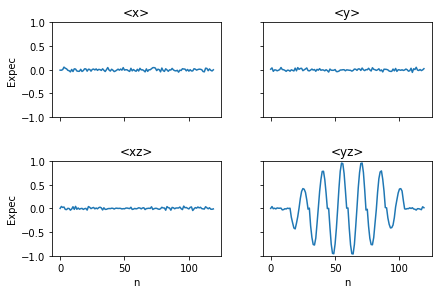

(None, None)

<Figure size 360x360 with 0 Axes>

In [9]:
# target matrix 
Ut = U3Gate(theta=pi, phi=0, lam=0).to_matrix()
WQPT1Q.WQPT_1Q_runner(res_theta, circuits=circ_u, device=simulator, shots=1024, inter=1, Ut=Ut)